# Math23k Analysis Report

## Data Description
| Field             | Annotation                                          |
| --------          | --------------------------------------------------- |
| id                | Id of the problem |
| original_text	    | Original text of the problem |
| equation          | Solution to the problem |
| segmented_text    | Chinese word segmentation of the problem |


In [1]:
import numpy as np
import pandas as pd
import jieba

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [2]:
path = "../raw_data/math23k/raw/train23k.json"

data = pd.read_json(path, orient='records')

## Record Examples

In [3]:
data.head()

,id,original_text,equation,segmented_text
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？


## The number of problems

In [4]:
len(data['id'].unique())

21162

## Part of missing values for every column

In [5]:
data.isnull().sum() / len(data)

id                0.0
original_text     0.0
equation          0.0
segmented_text    0.0
dtype: float64

## Cut words and find verbs in problems

In [6]:
import jieba.posseg as pseg
def cut_word(text):
    return jieba.lcut(text)

def find_verbs(text):
    words = pseg.cut(text)
    return [word for word,flag in words if flag == 'v']

data['content']=data['original_text'].apply(cut_word)
data['verbs']=data['original_text'].apply(find_verbs)
data.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\THY\AppData\Local\Temp\jieba.cache
Loading model cost 0.837 seconds.
Prefix dict has been built succesfully.


,id,original_text,equation,segmented_text,content,verbs
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 的, 商是, 1.5, ，, 如果, 甲数, 增加, 20, ，,...","[增加, 是]"
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 和, 货车, 分别, 从, A, 、, B, 两站, 同时, 相向, 开出, ，,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]"
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 本, ，, 第一天, 借出, 了, (, 1, /, 5, ...","[借出, 回, 有]"
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 、, 乙, 两车, 同时, 从, 相距, 230, 千米, 的, 两地, 相向, 而...","[相距, 相向, 相距, 已知]"
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 有, 苹果树, 300, 棵, ，, 比, 桔树, 多, 20%, ，, 桔...","[有, 有]"


## Count of words of problems

In [7]:
def getsize(ser):
    return len(ser)

data['word_count']=data['content'].apply(getsize)
data.head()

,id,original_text,equation,segmented_text,content,verbs,word_count
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 的, 商是, 1.5, ，, 如果, 甲数, 增加, 20, ，,...","[增加, 是]",24
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 和, 货车, 分别, 从, A, 、, B, 两站, 同时, 相向, 开出, ，,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 本, ，, 第一天, 借出, 了, (, 1, /, 5, ...","[借出, 回, 有]",28
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 、, 乙, 两车, 同时, 从, 相距, 230, 千米, 的, 两地, 相向, 而...","[相距, 相向, 相距, 已知]",38
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 有, 苹果树, 300, 棵, ，, 比, 桔树, 多, 20%, ，, 桔...","[有, 有]",17


## The length of problems

In [8]:
cnt = data['word_count'].value_counts().reset_index()
cnt.columns = [ 'word_count' , 'problem_count']

fig = px.bar(
    cnt , x = 'word_count', y = 'problem_count' ,
    title = 'The length of problems'
)
fig.show()

## Delete stopword

In [9]:
def get_stopword():
    s = set()
    with open("../raw_data/stopword/stopword.txt","r",encoding="UTF-8") as f:
        for line in f:
            s.add(line.strip())
    return s

def delete_stopword(words):
    return [w for w in words if (w not in stopword)]

stopword=get_stopword()
data['content']=data['content'].apply(delete_stopword)
data.head()

,id,original_text,equation,segmented_text,content,verbs,word_count
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 商是, 1.5, 甲数, 增加, 20, 甲数, 乙, 倍, 甲数]","[增加, 是]",24
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 货车, A, B, 两站, 相向, 开出, 小时, 相遇, 相遇, 两车, 按原,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 第一天, 借出, 第二天, 回, 图书, 角有, 本书]","[借出, 回, 有]",28
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 乙, 两车, 相距, 230, 千米, 两地, 相向, 而行, 小时, 两车, 相距...","[相距, 相向, 相距, 已知]",38
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 苹果树, 300, 棵, 桔树, 20%, 桔树, 棵]","[有, 有]",17


## The keywords

In [10]:
import jieba.analyse
def get_keyword(text):
    topk = min(3,len(text))
    keyword = [word for word in jieba.analyse.textrank(text, topK = topk)]
    return keyword

data['keywords'] = data['original_text'].apply(get_keyword)
data.head()

,id,original_text,equation,segmented_text,content,verbs,word_count,keywords
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 商是, 1.5, 甲数, 增加, 20, 甲数, 乙, 倍, 甲数]","[增加, 是]",24,"[甲数, 商是, 乙数]"
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 货车, A, B, 两站, 相向, 开出, 小时, 相遇, 相遇, 两车, 按原,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63,"[路程, 前进, 小时]"
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 第一天, 借出, 第二天, 回, 图书, 角有, 本书]","[借出, 回, 有]",28,"[角有书, 图书]"
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 乙, 两车, 相距, 230, 千米, 两地, 相向, 而行, 小时, 两车, 相距...","[相距, 相向, 相距, 已知]",38,"[小时, 相距, 已知]"
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 苹果树, 300, 棵, 桔树, 20%, 桔树, 棵]","[有, 有]",17,"[苹果树, 果园]"


## Topic Prediction

In [11]:
from gensim import corpora, models

all_words = []
for text in data['content']:
    all_words.append(text)
#print(all_words)
dictionary = corpora.Dictionary(all_words)
corpus = [dictionary.doc2bow(text) for text in all_words]

lda = models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5)

print('keyword of topics')
for topic in lda.print_topics(num_words = 5):
    print(topic)


keyword of topics
(0, '0.031*"页" + 0.028*"数" + 0.018*"厘米" + 0.017*"本书" + 0.017*"做"')
(1, '0.107*"元" + 0.029*"买" + 0.023*"修" + 0.018*"钱" + 0.013*"原价"')
(2, '0.056*"千克" + 0.024*"棵" + 0.018*"吨" + 0.014*"苹果" + 0.013*"人数"')
(3, '0.071*"千米" + 0.067*"小时" + 0.028*"行" + 0.017*"速度" + 0.016*"甲"')
(4, '0.068*"米" + 0.024*"计划" + 0.021*"生产" + 0.015*"天" + 0.015*"长"')


In [12]:

topic = []
for i,values in enumerate(lda.inference(corpus)[0]):
    topic_val = 0
    topic_id = 0
    for tid, val in enumerate(values):
        if val > topic_val:
            topic_val = val
            topic_id = tid
    topic.append(topic_id)
data['topic'] = topic
data.head(10)

,id,original_text,equation,segmented_text,content,verbs,word_count,keywords,topic
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 商是, 1.5, 甲数, 增加, 20, 甲数, 乙, 倍, 甲数]","[增加, 是]",24,"[甲数, 商是, 乙数]",3
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 货车, A, B, 两站, 相向, 开出, 小时, 相遇, 相遇, 两车, 按原,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63,"[路程, 前进, 小时]",3
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 第一天, 借出, 第二天, 回, 图书, 角有, 本书]","[借出, 回, 有]",28,"[角有书, 图书]",3
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 乙, 两车, 相距, 230, 千米, 两地, 相向, 而行, 小时, 两车, 相距...","[相距, 相向, 相距, 已知]",38,"[小时, 相距, 已知]",3
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 苹果树, 300, 棵, 桔树, 20%, 桔树, 棵]","[有, 有]",17,"[苹果树, 果园]",2
5,5901,某班学生参加数学兴趣小组，其中，参加的男生是全班人数的20%，参加的女生是全班人数的(2/7...,x=(5-2)/(20%+(2/7)+(3/5)-1),某班 学生 参加 数学 兴趣小组 ， 其中 ， 参加 的 男生 是 全班 人数 的 20% ...,"[某班, 学生, 参加, 数学, 兴趣小组, 参加, 男生, 全班, 人数, 20%, 参加...","[参加, 参加, 是, 参加, 是, 参加, 有]",55,"[参加, 全班, 人数]",2
6,12815,某商店有36筐苹果，每筐重40千克，运来的苹果重量是梨的8倍，运来梨多少千克？,x=36*40/8,某 商店 有 36 筐 苹果 ， 每 筐 重 40 千克 ， 运 来 的 苹果 重量 是 梨...,"[商店, 36, 筐, 苹果, 每筐, 重, 40, 千克, 运来, 苹果, 重量, 梨, ...","[有, 运来, 是, 运来]",27,"[苹果, 重量, 运来]",2
7,19584,阳光小学举行少先队队仪式比赛，全校共有720名少先队员，平均分成15个中队，每个中队又分成4...,x=720/15/4,阳光 小学 举行 少先队 队 仪式 比赛 ， 全校 共有 720 名 少先队员 ， 平均 分...,"[阳光, 小学, 少先队, 队, 仪式, 比赛, 全校, 共有, 720, 名, 少先队员,...","[举行, 共有, 分成, 分成, 分, 有]",36,"[仪式, 比赛, 少先队员]",4
8,10773,大猴有9只，小猴比大猴多4只，小猴有多少只．,x=9+4,大 猴 有 9 只 ， 小 猴 比 大 猴 多 4 只 ， 小 猴 有 多少 只 ．,"[大猴, 小猴, 比大猴, 小猴]","[有, 有]",16,[],0
9,22037,一根电线，用去(3/5)米，用去的比剩下的少(1/4)米，这根电线原来有多长？,x=(3/5)+(1/4)+(3/5),一 根 电线 ， 用 去 (3/5) 米 ， 用 去 的 比 剩下 的 少 (1/4) 米 ...,"[一根, 电线, 米, 剩下, 少, 米, 这根, 电线, 多长]","[去, 用去, 剩下, 有]",32,"[用去, 电线, 剩下]",4


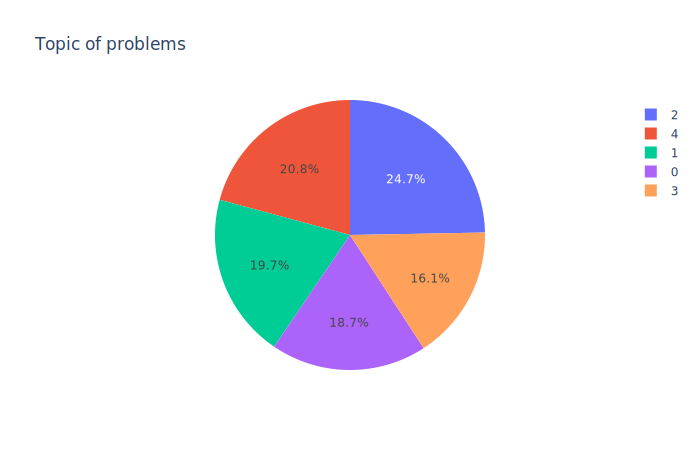

In [13]:
output = data['topic'].value_counts().reset_index()
output.columns=['topic_id','number of problems']

fig = px.pie(
    output,
    names = 'topic_id',
    values = 'number of problems',
    title = 'Topic of problems'    
)

fig.show("svg")

## Number of operators

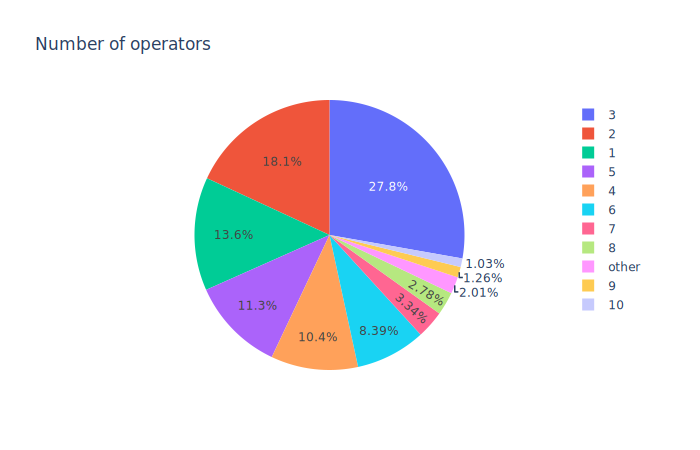

In [14]:
def num_of_operators(equation):
    cnt = 0
    for op in equation:
        if op =='(' or op == '+' or op == '-' or op == '*' or op == '/' or op == '^':
            cnt += 1
    return cnt

tmp = data.loc[:,['equation']]
tmp['operators_cnt'] = tmp['equation'].apply(num_of_operators)
cnt = tmp['operators_cnt'].value_counts().reset_index()
output = cnt.head(10)
other_sum = cnt['operators_cnt'].sum() - output['operators_cnt'].sum()

output = output.sort_values(['operators_cnt'])
output.loc[10] = ['other', other_sum]

output.columns=['number of operators','number of problems']

fig = px.pie(
    output,
    names = 'number of operators',
    values = 'number of problems',
    title = 'Number of operators'    
)

fig.show("svg")

## Evaluate difficulty

In [15]:
def calc_difficulty(equation):
    difficulty = 0

    def eval(x):
        if x == '+' : return 2
        elif x == '-' : return 3
        elif x == '*' : return 5
        elif x == '/' : return 7
        elif x == '(' : return 8
        elif x == '%' : return 5
        elif x == '^' : return 6
        else : return 0

    for op in equation:
        difficulty += eval(op)
    return difficulty


data['difficulty'] = data['equation'].apply(calc_difficulty)

cnt = data['difficulty'].value_counts().reset_index()
cnt.columns = [ 'difficulty' , 'problem_count']

fig = px.bar(
    cnt , x = 'difficulty', y = 'problem_count' ,
    title = 'The difficulty of problems'
)
fig.show()

## The most difficult problems

In [16]:
tmp = data[['id','original_text','difficulty']]
tmp = tmp.sort_values(['difficulty']).tail(10)
tmp ['id'] = tmp['id'] . astype(str)
fig = px.bar(
    tmp , x = 'difficulty', y = 'id' ,
    orientation = 'h',
    title = 'The difficulty of problems'
)
fig.show()

## Simplify expressions

'+' means operator '+' or '-', '\*' means operator '\*' or '/', 'n' means number

In [17]:
from pythonds.basic.stack import Stack


def simplify(expr): 
    n = len(expr)
    output = ''
    flag = True
    for i in range(2,n):
        if flag and (expr[i].isdigit() or expr[i] == '.' or expr[i] == '%'):
            output = output + 'n'
            flag = False
        if not (expr[i].isdigit() or expr[i] == '.' or expr[i] == '%'):
            if expr[i] == '[' or expr[i] == '{':
                output = output + '('
            elif expr[i] == ']' or expr[i] == '}':
                output = output + ')'
            elif expr[i] == '-':
                output = output + '+'
            elif expr[i] == '/':
                output = output + '*'
            else: output = output + expr[i]
            flag = True
    return output
    
data['post_expression'] = data['equation'].apply(simplify)

## Count of numbers in equations

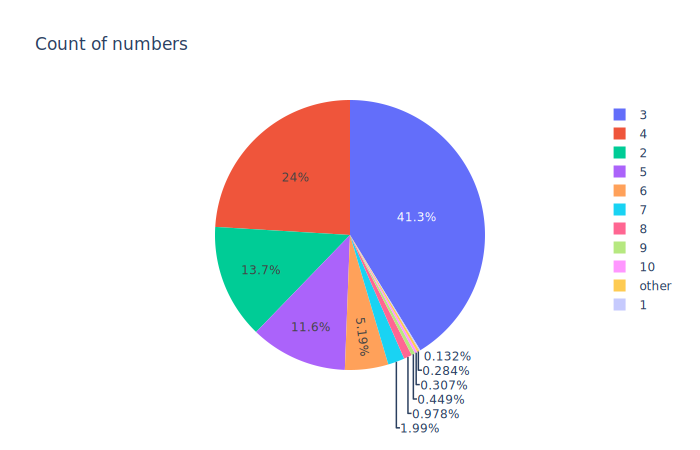

In [18]:
def CountNum(expr):
    cnt = 0
    for x in expr:
        if x == 'n':
            cnt = cnt + 1
    return cnt

tmp = data.loc[:,['post_expression']]
tmp['number_cnt'] = tmp['post_expression'].apply(CountNum)
cnt = tmp['number_cnt'].value_counts().reset_index()
output = cnt.head(10)
other_sum = cnt['number_cnt'].sum() - output['number_cnt'].sum()

output = output.sort_values(['number_cnt'])
output.loc[10] = ['other', other_sum]

output.columns=['count of numbers','number of problems']

fig = px.pie(
    output,
    names = 'count of numbers',
    values = 'number of problems',
    title = 'Count of numbers'    
)

fig.show("svg")    

## Postfix expression

In [19]:
def InfixToPostfix(infixexpr):
    prec = {}
    prec['^'] = 4
    prec["*"] = 3
    prec["/"] = 3
    prec["+"] = 2
    prec["-"] = 2
    prec["("] = 1

    opstack = Stack()
    postfixList = []

    for token in infixexpr:
        if token == 'n':
            postfixList.append(token)
        elif token == "(":
            opstack.push(token)
        elif token == ")":
            topstack = opstack.pop()
            while topstack != "(":
                postfixList.append(topstack)
                if opstack.isEmpty():
                    print(infixexpr)
                else :
                    topstack = opstack.pop()
        else:
            while (not opstack.isEmpty()) and (prec[opstack.peek()] >= prec[token]):
                postfixList.append(opstack.pop())
            opstack.push(token)
    while not opstack.isEmpty():
        postfixList.append(opstack.pop())
    return ''.join(postfixList)


data['post_expression'] = data['post_expression'].apply(InfixToPostfix)

data.head()

,id,original_text,equation,segmented_text,content,verbs,word_count,keywords,topic,difficulty,post_expression
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 商是, 1.5, 甲数, 增加, 20, 甲数, 乙, 倍, 甲数]","[增加, 是]",24,"[甲数, 商是, 乙数]",3,23,nnn+*n*
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 货车, A, B, 两站, 相向, 开出, 小时, 相遇, 相遇, 两车, 按原,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63,"[路程, 前进, 小时]",3,58,nnnnn+*+n+*
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 第一天, 借出, 第二天, 回, 图书, 角有, 本书]","[借出, 回, 有]",28,"[角有书, 图书]",3,33,nnnn*+*n+
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 乙, 两车, 相距, 230, 千米, 两地, 相向, 而行, 小时, 两车, 相距...","[相距, 相向, 相距, 已知]",38,"[小时, 相距, 已知]",3,21,nn+n*n+
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 苹果树, 300, 棵, 桔树, 20%, 桔树, 棵]","[有, 有]",17,"[苹果树, 果园]",2,22,nnn+*


## Template of postfix expressions

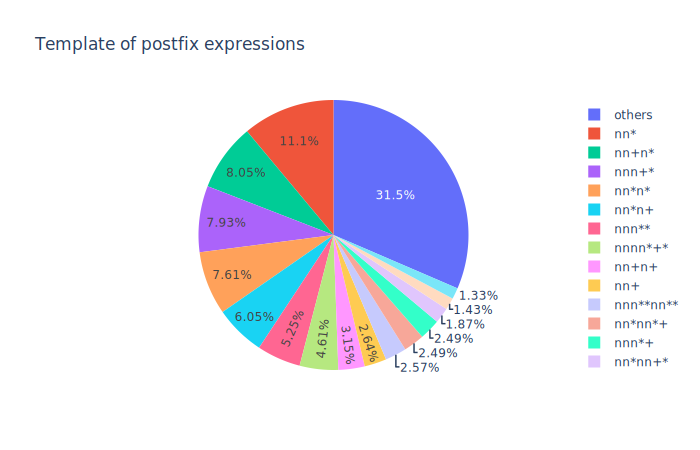

In [20]:
ds = data['post_expression'].value_counts().reset_index()
ds = ds.sort_values(['post_expression'])

output = ds.tail(15)
other_sum = ds['post_expression'].sum() - output['post_expression'].sum()

output.columns = [
    'post_expression',
    'percent'
]

output = output.sort_values(['percent'])
output.loc[15] = ['others', other_sum]

fig = px.pie(
    output,
    names = 'post_expression',
    values = 'percent',
    title = 'Template of postfix expressions',
)

fig.show("svg")